# The Covariance Matrix

Consider a set of observed data, for example the Iris dataset.

In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

/Users/joshuacook/miniconda3/envs/summer2018/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


In [2]:
iris = load_iris()
X, y = iris.data, iris.target

In [3]:
X = pd.DataFrame(X)

In [4]:
X.sample(5, random_state=10)

,0,1,2,3
87,6.3,2.3,4.4,1.3
111,6.4,2.7,5.3,1.9
10,5.4,3.7,1.5,0.2
91,6.1,3.0,4.6,1.4
49,5.0,3.3,1.4,0.2


If we center this matrix of observed values, that is subtract the mean of column from each column, then this represents how far off from the mean of the observed values, a given value was. 

/Users/joshuacook/miniconda3/envs/summer2018/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


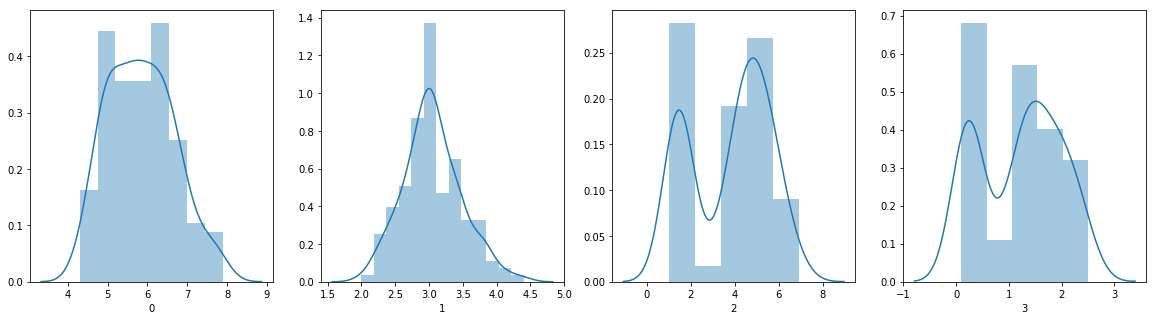

In [5]:
fig, ax = plt.subplots(1,4, figsize=(20,5))
for i, feature in enumerate(X.columns):
    sns.distplot(X[feature], ax=ax[i])

In [6]:
X_c = X - X.mean()

In [8]:
X.mean()

0    5.843333
1    3.054000
2    3.758667
3    1.198667
dtype: float64

/Users/joshuacook/miniconda3/envs/summer2018/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


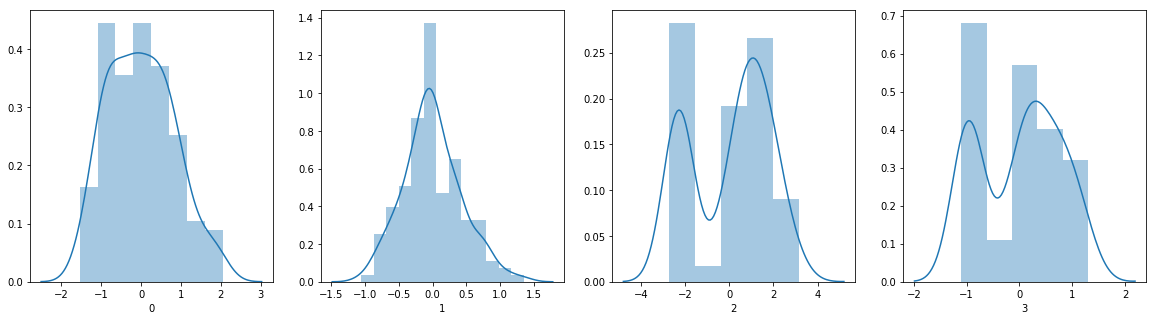

In [7]:
fig, ax = plt.subplots(1,4, figsize=(20,5))
for i, feature in enumerate(X_c.columns):
    sns.distplot(X_c[feature], ax=ax[i])

In [ ]:
X_c.sample(5, random_state=10)

## Total Sum of Squares

You might recall from our discussion of linear models and loss functions that this is closely related to the TSS, the **total sum of squares**. 

https://en.wikipedia.org/wiki/Total_sum_of_squares

$$\text{TSS} = \sum (x_i -\bar{x})^2 = (\mathbf{x} - \mathbf{\bar{x}})^T(\mathbf{x} - \mathbf{\bar{x}})$$

for a given feature vector, $\mathbf{x}$.

Here, $\bar{x}$ represents the mean value of $\mathbf{x}$ and $\mathbf{\bar{x}}$ represents a vector of the same size as $\mathbf{x}$ with each element equal to $\bar{x}$.

In pure python:

In [ ]:
xx = [1,2,3,4,5]
x_bar = sum(xx)/len(xx)

In [ ]:
x_bar

In [ ]:
x_c = [x_i - x_bar for x_i in xx]

In [ ]:
x_c

In [ ]:
TSS = sum([x_i*x_i for x_i in x_c])
TSS

If we perform these dot products on our centered data, we have the TSS for each feature.

In [ ]:
TSS_0 = X_c[0].dot(X_c[0])
TSS_1 = X_c[1].dot(X_c[1])
TSS_2 = X_c[2].dot(X_c[2])
TSS_3 = X_c[3].dot(X_c[3])
TSS_0, TSS_1, TSS_2, TSS_3

## Variance

If we divide TSS by the number of items in the vector, we have the variance of feature.

In [ ]:
n = X_c.shape[0]
n

In [ ]:
pd.Series.var

In [ ]:
var_0 = TSS_0/n
var_0, X_c[0].var(ddof=0)

In [ ]:
var_1 = TSS_1/n
var_1, X_c[1].var(ddof=0)

In [ ]:
X_c[1].var()

Note that we had to specify a `ddof` of 0. The default is a `ddof` of 1, corresponding to a scaling by `n-1`, that is the [sample correction](https://en.wikipedia.org/wiki/Bessel%27s_correction).

In [ ]:
var_0 = TSS_0/(n-1)
var_0, X_c[0].var()

In [ ]:
var_1 = TSS_1/(n-1)
var_1, X_c[1].var()

$$\text{TSS} = n\text{Var}(x) = n\sigma^2$$

## Covariance

We can find the covariance by multiplying two different centered features and dividing by the number of features.

This is available by the `pandas.DataFrame` argument `.cov()`. Note that by default, this is done using `n-1`.

In [9]:
X_c.cov()

,0,1,2,3
0,0.685694,-0.039268,1.273682,0.516904
1,-0.039268,0.188004,-0.321713,-0.117981
2,1.273682,-0.321713,3.113179,1.296387
3,0.516904,-0.117981,1.296387,0.582414


In [ ]:
X_c[0].dot(X_c[1])/(n-1)

In [ ]:
import seaborn as sns


In [ ]:
sns.pairplot(X_c)

`pandas.DataFrame.cov()` return a **Covariance Matrix** consisting of the respective sample covariances between each feature. Note that the diagonal contains the variances, which is to say that the covariance between a feature and itself is the variance of that feature. 

## Interpretation in terms of Single Variable Regression

In [ ]:
X_c.columns = iris.feature_names

In [ ]:
sns.pairplot(X_c, kind='reg')

In [ ]:
X_c.cov()

In [ ]:
X.shape

In [ ]:
X.cov().shape

In [ ]:
X.cov()